In [19]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import corner as corner

In [21]:
result=h5py.File('bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')

In [4]:
result['posterior'].keys()

<KeysViewHDF5 ['alpha', 'beta', 'gamma', 'gaussian_mass_maximum', 'lam', 'lamb', 'ln_bf_0', 'ln_bf_1', 'ln_bf_10', 'ln_bf_100', 'ln_bf_101', 'ln_bf_102', 'ln_bf_103', 'ln_bf_104', 'ln_bf_105', 'ln_bf_106', 'ln_bf_107', 'ln_bf_108', 'ln_bf_109', 'ln_bf_11', 'ln_bf_110', 'ln_bf_111', 'ln_bf_112', 'ln_bf_113', 'ln_bf_114', 'ln_bf_115', 'ln_bf_116', 'ln_bf_117', 'ln_bf_118', 'ln_bf_119', 'ln_bf_12', 'ln_bf_120', 'ln_bf_121', 'ln_bf_122', 'ln_bf_123', 'ln_bf_124', 'ln_bf_125', 'ln_bf_126', 'ln_bf_127', 'ln_bf_128', 'ln_bf_129', 'ln_bf_13', 'ln_bf_130', 'ln_bf_131', 'ln_bf_132', 'ln_bf_133', 'ln_bf_134', 'ln_bf_135', 'ln_bf_136', 'ln_bf_137', 'ln_bf_138', 'ln_bf_139', 'ln_bf_14', 'ln_bf_140', 'ln_bf_141', 'ln_bf_142', 'ln_bf_143', 'ln_bf_144', 'ln_bf_145', 'ln_bf_146', 'ln_bf_147', 'ln_bf_148', 'ln_bf_149', 'ln_bf_15', 'ln_bf_150', 'ln_bf_151', 'ln_bf_152', 'ln_bf_153', 'ln_bf_154', 'ln_bf_155', 'ln_bf_156', 'ln_bf_157', 'ln_bf_16', 'ln_bf_17', 'ln_bf_18', 'ln_bf_19', 'ln_bf_2', 'ln_bf_20', 

In [36]:
important_result = [result['posterior']['alpha'], result['posterior']['beta'], result['posterior']['gamma'],\
                    result['posterior']['mmin'], result['posterior']['mmax']]
important_result_dict = {'alpha':result['posterior']['alpha'], 
                         'beta':result['posterior']['beta'], 
                         'gamma':result['posterior']['gamma'],
                         'mmin': result['posterior']['mmin'], 
                         'mmax': result['posterior']['mmax']}

In [6]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm min}$', r'$m_{\rm max}$',],
)

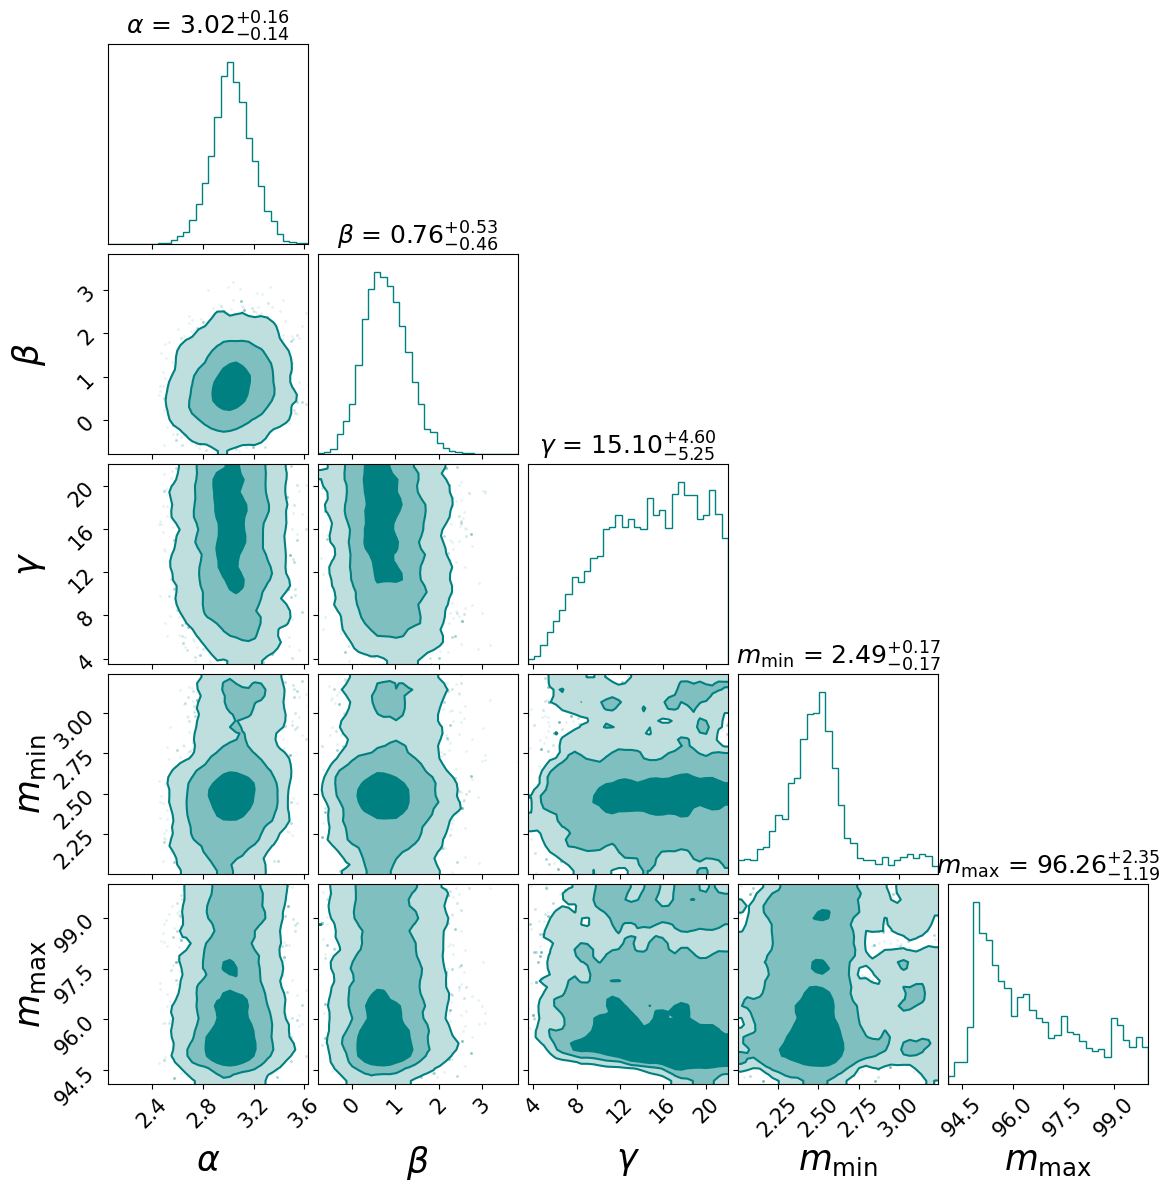

In [7]:
plt.rcParams.update({'font.size': 15})
corner.corner(np.swapaxes(important_result, 0,1), **corner_kwargs)
plt.savefig('resultscorner_powerlawinf.pdf')

In [9]:
def m2min_m1(mass1, mmax, mmin, gamma):
    m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin
    return m2min

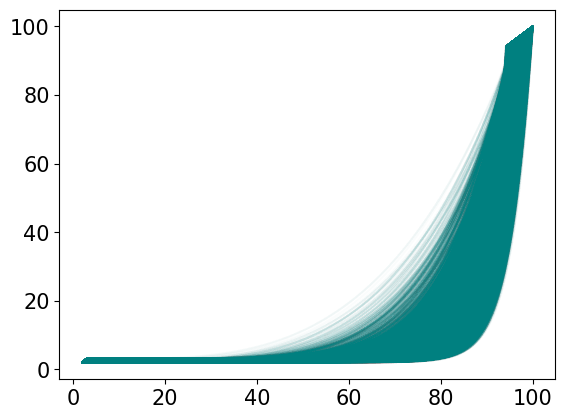

In [50]:
for i in range(1000):#len(result['posterior']['alpha'])):
    mass1 = np.linspace(important_result_dict['mmin'][i], important_result_dict['mmax'][i],1000)
    m2min = m2min_m1(mass1, important_result_dict['mmax'][i], important_result_dict['mmin'][i],\
                     important_result_dict['gamma'][i])
    plt.plot(mass1, m2min, color='teal', alpha=0.02)

Text(0, 0.5, '$m_2^{\\rm min}$')

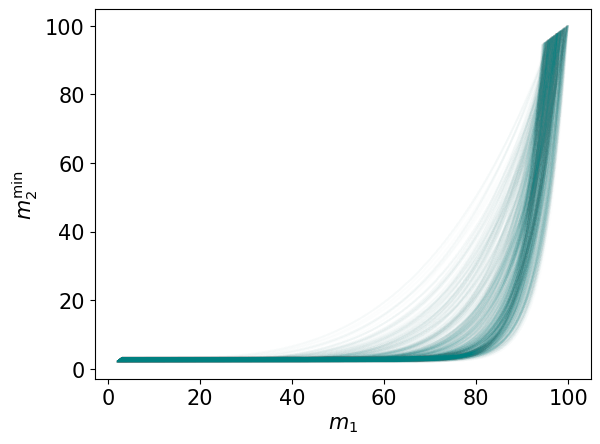

In [54]:
for i in range(1000):#len(result['posterior']['alpha'])):
    mass1 = np.linspace(important_result_dict['mmin'][i], important_result_dict['mmax'][i],1000)
    m2min = m2min_m1(mass1, important_result_dict['mmax'][i], important_result_dict['mmin'][i],\
                     important_result_dict['gamma'][i])
    plt.plot(mass1, m2min, color='teal', alpha=0.01)

mass_1
plt.plot()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')